In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import numpy as np
import json
import pickle
import copy
import os
import pandas as pd
import recordlinkage
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
from pathlib import Path
from collections import defaultdict 
import dicom_contour.contour as dcm
from scipy import ndimage, sparse
import medpy.metric as metric
from dicom_contour.contour import get_contour_file,get_roi_names, coord2pixels, cfile2pixels, plot2dcontour, slice_order, get_contour_dict, get_data,  create_image_mask_files, fill_contour, get_data_new, get_contour_files
from Metrics_Analysis import metrics_organ, loop_metrics_organs
from NameMatching import generate_mask, generate_physician_mask, Rename_fuzzy, geometry_relation, dir_similirity, angle_3axl, loop_patients_geoStat, process_geo_relation, check_stdName
from NameMatching import df_stat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
class IndexTracker(object):
    def __init__(self, ax, X,fig,bmin,bmax):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.fig = fig
        self.slices, row, cols = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[self.ind,:,:],cmap='gray',vmin=bmin, vmax=bmax)
        fig.colorbar(self.im, ax=self.ax )
      #  self.im.colorbar()
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[self.ind,:, :])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [6]:
standard_list =["Tongue_Base", "Tongue_Oral", "Trachea","Bone","SpinalCord","Scar","Retinas","Retina_R","Retina_L","Lens_R","Lens_L","Parotid_R",
       "Parotid_L","Parotids","OpticNrv_R","OpticNrv_L", "OpticNrv","OpticChiasm", "Musc_Constrict_S", "Musc_Constrict_M","Musc_Constrict_I","Musc_Constrict",
       "Lungs", "Lips","Larnx_SG","Larnyx","Glnd_Submands","Glnd_Submand_L","Glnd_Submand_R", "Eyes", "Eye_R", "Eye_L","Esophagus",
      "Ear_Internal_R", "Ear_Internal_L","Cochlea_R","Cochlea_L","Cochlea","Brainstem","Brain","Brachialplexs","BrachialPlex_R",
      "BrachialPlex_L", "Bone_Mandible","Body","Mouth_Floor",'Cavity_Oral','Pitutary','Thyroid','Carotid','Carotid_L','Carotid_R',
               "Arytenoid", "Arytenoid_L", "Arytenoid_R", "Ethmoid", "Occipital","Parietal_L","Parietal_R","Parietal","Sphenoid","Temporal",
               "Temporal_L","Temporal_R","Cavity_Nasal","Cerebrum","Cerebrum_L","Cerebrum_R","Glnd_Lacrimal","Glnd_Lacrimal_L","Glnd_Lacrimal_R",
               "Glottis", "Nasopharynx"]

In [133]:
parent_path = 'HN'
geo_relation = loop_patients_geoStat(parent_path, standard_list)

work on patient HN\HN20039-01
work on RS structure  Physician +++++++++++++++++++++++++++
work on organ BODY _____________
work on organ .CTV60 _____________
work on organ .PTV54_AA _____________
work on organ .PTV60_AA _____________
work on organ .PTV70_AA _____________
work on organ Brach Plexus,L _____________
work on organ Brain _____________
work on organ Brain Stem _____________
work on organ Brain Stem/PRV _____________
work on organ Cochlea Rt _____________
work on organ Cochlea_L _____________
work on organ Epiglottis _____________
work on organ Esophagus _____________
work on organ Larynx _____________
work on organ Lens, Lt _____________
work on organ Lens, Rt _____________
work on organ Mandible _____________
work on organ Oral Cavity _____________
work on organ Parotid, Rt _____________
work on organ PC, inf _____________
the roi name converted to  Musc_Constrict inf ============
work on organ PC, mid _____________
the roi name converted to  Musc_Constrict mid ============

C:\Users\ddu\MedicalMind\NameMatching.py:203: RuntimeWarning: invalid value encountered in true_divide
  vector = vector /distance


geometry relation start to work on organs BODY  and  Parotid_Rt
geometry relation start to work on organs BODY  and  Parotid_Lt
geometry relation start to work on organs BODY  and  mandible
geometry relation start to work on organs BODY  and  Lips
geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Cochlea_Rt
geometry relation start to work on organs BODY  and  Cochlea_Lt
geometry relation start to work on organs BODY  and  Brainstem
geometry relation start to work on organs BODY  and  Brain
geometry relation start to work on organs Parotid_Rt  and  BODY
geometry relation start to work on organs Parotid_Rt  and  Parotid_Rt
geometry relation start to work on organs Parotid_Rt  and  Parotid_Lt
geometry relation start to work on organs Parotid_Rt  and  mandible
geometry relation start to work on organs Parotid_Rt  and  Lips
geometry relation start to work on organs P

work on organ Globe_R _____________
work on organ Larynx _____________
work on organ Lens_L _____________
work on organ Lens_R _____________
work on organ Lips _____________
work on organ Mandible _____________
work on organ Metal _____________
work on organ OpticChiasm _____________
work on organ OpticChiasm_PRV _____________
work on organ Parotid_L _____________
work on organ Parotid_R _____________
work on organ PC_inf _____________
the roi name converted to  Musc_Constrictinf ============
work on organ PC_mid _____________
the roi name converted to  Musc_Constrictmid ============
work on organ PC_sup _____________
the roi name converted to  Musc_Constrictsup ============
work on organ Ring 2cm/70 _____________
work on organ SMG_L _____________
the roi name converted to  Glnd_Submand__L ============
work on organ SMG_R _____________
the roi name converted to  Glnd_Submand__R ============
work on organ SpinalCord _____________
work on organ SpinalCord_PRV _____________
work on organ 

geometry relation start to work on organs Cochlea_L  and  Glnd_Submand__R
geometry relation start to work on organs Cochlea_L  and  SpinalCord
geometry relation start to work on organs Cochlea_L  and  Brain
geometry relation start to work on organs Cochlea_L  and  BrachialPlexus_R
geometry relation start to work on organs Cochlea_L  and  BODY
geometry relation start to work on organs Cochlea_L  and  .ptv/brachial pl
geometry relation start to work on organs Cochlea_R  and  Brainstem
geometry relation start to work on organs Cochlea_R  and  Cochlea_L
geometry relation start to work on organs Cochlea_R  and  Cochlea_R
geometry relation start to work on organs Cochlea_R  and  Epiglottis
geometry relation start to work on organs Cochlea_R  and  Esophagus
geometry relation start to work on organs Cochlea_R  and  Larynx
geometry relation start to work on organs Cochlea_R  and  Lens_L
geometry relation start to work on organs Cochlea_R  and  Lens_R
geometry relation start to work on organs Co

geometry relation start to work on organs Lens_L  and  .ptv/brachial pl
geometry relation start to work on organs Lens_R  and  Brainstem
geometry relation start to work on organs Lens_R  and  Cochlea_L
geometry relation start to work on organs Lens_R  and  Cochlea_R
geometry relation start to work on organs Lens_R  and  Epiglottis
geometry relation start to work on organs Lens_R  and  Esophagus
geometry relation start to work on organs Lens_R  and  Larynx
geometry relation start to work on organs Lens_R  and  Lens_L
geometry relation start to work on organs Lens_R  and  Lens_R
geometry relation start to work on organs Lens_R  and  Lips
geometry relation start to work on organs Lens_R  and  Mandible
geometry relation start to work on organs Lens_R  and  OpticChiasm
geometry relation start to work on organs Lens_R  and  Parotid_L
geometry relation start to work on organs Lens_R  and  Parotid_R
geometry relation start to work on organs Lens_R  and  Musc_Constrictinf
geometry relation star

geometry relation start to work on organs Parotid_R  and  Larynx
geometry relation start to work on organs Parotid_R  and  Lens_L
geometry relation start to work on organs Parotid_R  and  Lens_R
geometry relation start to work on organs Parotid_R  and  Lips
geometry relation start to work on organs Parotid_R  and  Mandible
geometry relation start to work on organs Parotid_R  and  OpticChiasm
geometry relation start to work on organs Parotid_R  and  Parotid_L
geometry relation start to work on organs Parotid_R  and  Parotid_R
geometry relation start to work on organs Parotid_R  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_R  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_R  and  Musc_Constrictsup
geometry relation start to work on organs Parotid_R  and  Glnd_Submand__L
geometry relation start to work on organs Parotid_R  and  Glnd_Submand__R
geometry relation start to work on organs Parotid_R  and  SpinalCord
geometry relation start 

geometry relation start to work on organs Glnd_Submand__L  and  .ptv/brachial pl
geometry relation start to work on organs Glnd_Submand__R  and  Brainstem
geometry relation start to work on organs Glnd_Submand__R  and  Cochlea_L
geometry relation start to work on organs Glnd_Submand__R  and  Cochlea_R
geometry relation start to work on organs Glnd_Submand__R  and  Epiglottis
geometry relation start to work on organs Glnd_Submand__R  and  Esophagus
geometry relation start to work on organs Glnd_Submand__R  and  Larynx
geometry relation start to work on organs Glnd_Submand__R  and  Lens_L
geometry relation start to work on organs Glnd_Submand__R  and  Lens_R
geometry relation start to work on organs Glnd_Submand__R  and  Lips
geometry relation start to work on organs Glnd_Submand__R  and  Mandible
geometry relation start to work on organs Glnd_Submand__R  and  OpticChiasm
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_L
geometry relation start to work on organs G

geometry relation start to work on organs .ptv/brachial pl  and  Cochlea_L
geometry relation start to work on organs .ptv/brachial pl  and  Cochlea_R
geometry relation start to work on organs .ptv/brachial pl  and  Epiglottis
geometry relation start to work on organs .ptv/brachial pl  and  Esophagus
geometry relation start to work on organs .ptv/brachial pl  and  Larynx
geometry relation start to work on organs .ptv/brachial pl  and  Lens_L
geometry relation start to work on organs .ptv/brachial pl  and  Lens_R
geometry relation start to work on organs .ptv/brachial pl  and  Lips
geometry relation start to work on organs .ptv/brachial pl  and  Mandible
geometry relation start to work on organs .ptv/brachial pl  and  OpticChiasm
geometry relation start to work on organs .ptv/brachial pl  and  Parotid_L
geometry relation start to work on organs .ptv/brachial pl  and  Parotid_R
geometry relation start to work on organs .ptv/brachial pl  and  Musc_Constrictinf
geometry relation start to wo

work on organ Ring _____________
work on organ SkinOAR _____________
work on organ SMG_L _____________
the roi name converted to  Glnd_Submand__L ============
work on organ SMG_R _____________
the roi name converted to  Glnd_Submand__R ============
work on organ SpinalCord_05 _____________
work on organ SpinalCord _____________
work on organ PTV_6996_Eval _____________
work on organ PTV_6996_Opt _____________
work on organ PTV_6996inBrPl_R _____________
work on organ PTV_5940_Eval _____________
work on organ GTVp+8 _____________
work on organ CTV_5940p _____________
work on organ CTV_5940n _____________
work on organ GTVn+5 _____________
work on organ CTV_5940 _____________
work on organ PTV_5940 _____________
work on organ PTV_5940_Opt _____________
work on organ PTV_5412_Eval _____________
start work on organ
Skin  -->  NA
start work on organ
Avoidance4  -->  NA
start work on organ
Avoidance3  -->  NA
start work on organ
Parotid_L_Opt  -->  Parotid_L  score is  82
start work on organ

geometry relation start to work on organs BrachialPlexus_L  and  SpinalCord
geometry relation start to work on organs BrachialPlexus_R  and  OpticChiasm
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus_R  and  Eye_R
geometry relation start to work on organs BrachialPlexus_R  and  Eye_L
geometry relation start to work on organs BrachialPlexus_R  and  TemporalLobe_R
geometry relation start to work on organs BrachialPlexus_R  and  TemporalLobe_L
geometry relation start to work on organs BrachialPlexus_R  and  Subglottis
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_R
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_L
geometry relation start to work on organs BrachialPlexus_R  and  BODY
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus
geome

geometry relation start to work on organs TemporalLobe_L  and  BrachialPlexus
geometry relation start to work on organs TemporalLobe_L  and  BrainStem
geometry relation start to work on organs TemporalLobe_L  and  Esophagus
geometry relation start to work on organs TemporalLobe_L  and  LarynxGSL
geometry relation start to work on organs TemporalLobe_L  and  Lens_L
geometry relation start to work on organs TemporalLobe_L  and  Lens_R
geometry relation start to work on organs TemporalLobe_L  and  Mandible
geometry relation start to work on organs TemporalLobe_L  and  OpticNerve_L
geometry relation start to work on organs TemporalLobe_L  and  OpticNerve_R
geometry relation start to work on organs TemporalLobe_L  and  Parotid_L
geometry relation start to work on organs TemporalLobe_L  and  Parotid_R
geometry relation start to work on organs TemporalLobe_L  and  Musc_Constrict inf
geometry relation start to work on organs TemporalLobe_L  and  Glnd_Submand__L
geometry relation start to work 

geometry relation start to work on organs BrachialPlexus  and  OpticChiasm
geometry relation start to work on organs BrachialPlexus  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus  and  Eye_R
geometry relation start to work on organs BrachialPlexus  and  Eye_L
geometry relation start to work on organs BrachialPlexus  and  TemporalLobe_R
geometry relation start to work on organs BrachialPlexus  and  TemporalLobe_L
geometry relation start to work on organs BrachialPlexus  and  Subglottis
geometry relation start to work on organs BrachialPlexus  and  Cochlea_R
geometry relation start to work on organs BrachialPlexus  and  Cochlea_L
geometry relation start to work on organs BrachialPlexus  and  BODY
geometry relation start to work on organs BrachialPlexus  and  BrachialPlexus
geometry relation start to work on organs BrachialPlexus  and  BrainStem
geometry relation start to work 

geometry relation start to work on organs Lens_L  and  Esophagus
geometry relation start to work on organs Lens_L  and  LarynxGSL
geometry relation start to work on organs Lens_L  and  Lens_L
geometry relation start to work on organs Lens_L  and  Lens_R
geometry relation start to work on organs Lens_L  and  Mandible
geometry relation start to work on organs Lens_L  and  OpticNerve_L
geometry relation start to work on organs Lens_L  and  OpticNerve_R
geometry relation start to work on organs Lens_L  and  Parotid_L
geometry relation start to work on organs Lens_L  and  Parotid_R
geometry relation start to work on organs Lens_L  and  Musc_Constrict inf
geometry relation start to work on organs Lens_L  and  Glnd_Submand__L
geometry relation start to work on organs Lens_L  and  Glnd_Submand__R
geometry relation start to work on organs Lens_L  and  SpinalCord
geometry relation start to work on organs Lens_R  and  OpticChiasm
geometry relation start to work on organs Lens_R  and  BrachialPlex

geometry relation start to work on organs Parotid_L  and  BrachialPlexus_L
geometry relation start to work on organs Parotid_L  and  BrachialPlexus_R
geometry relation start to work on organs Parotid_L  and  Eye_R
geometry relation start to work on organs Parotid_L  and  Eye_L
geometry relation start to work on organs Parotid_L  and  TemporalLobe_R
geometry relation start to work on organs Parotid_L  and  TemporalLobe_L
geometry relation start to work on organs Parotid_L  and  Subglottis
geometry relation start to work on organs Parotid_L  and  Cochlea_R
geometry relation start to work on organs Parotid_L  and  Cochlea_L
geometry relation start to work on organs Parotid_L  and  BODY
geometry relation start to work on organs Parotid_L  and  BrachialPlexus
geometry relation start to work on organs Parotid_L  and  BrainStem
geometry relation start to work on organs Parotid_L  and  Esophagus
geometry relation start to work on organs Parotid_L  and  LarynxGSL
geometry relation start to work

geometry relation start to work on organs Glnd_Submand__R  and  Cochlea_L
geometry relation start to work on organs Glnd_Submand__R  and  BODY
geometry relation start to work on organs Glnd_Submand__R  and  BrachialPlexus
geometry relation start to work on organs Glnd_Submand__R  and  BrainStem
geometry relation start to work on organs Glnd_Submand__R  and  Esophagus
geometry relation start to work on organs Glnd_Submand__R  and  LarynxGSL
geometry relation start to work on organs Glnd_Submand__R  and  Lens_L
geometry relation start to work on organs Glnd_Submand__R  and  Lens_R
geometry relation start to work on organs Glnd_Submand__R  and  Mandible
geometry relation start to work on organs Glnd_Submand__R  and  OpticNerve_L
geometry relation start to work on organs Glnd_Submand__R  and  OpticNerve_R
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_L
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_R
geometry relation start to work on orga

work on organ .LNIII-Rt _____________
work on organ .LNV-Rt _____________
work on organ .preop-temp _____________
work on organ .preopGTV _____________
work on organ .CTV66n-Rt _____________
work on organ .PTV54-Rt1 _____________
work on organ .PTV54-Rt2 _____________
work on organ .PTV60-Rt1 _____________
work on organ .LNIV-Rt _____________
work on organ .PTV54p _____________
work on organ .PTV60-Rt2 _____________
work on organ .PTV54-Rt5 _____________
start work on organ
BODY  -->  Body  score is  100
.CTV54p  is  a target structure
.PTV54  is  a target structure
.PTV66n  is  a target structure
.PTV54-Lt  is  a target structure
.PTV54-plan  is  a target structure
.PTV54-Rt4  is  a target structure
.PTV54-Rt3  is  a target structure
.PTV60-plan  is  a target structure
.PTV66-plan  is  a target structure
start work on organ
BrachPlexus_Rt  -->  BrachialPlex_R  score is  79
start work on organ
Epiglottis  -->  Glottis  score is  82
start work on organ
FOM  -->  NA
start work on organ
L

work on organ Artifact _____________
work on organ .PTV70n-NEW _____________
work on organ .PTV66p-NEW _____________
work on organ .PTV66n-2-NEW _____________
work on organ .PTV66n-1-NEW _____________
work on organ .PTV66n-NEW _____________
work on organ .PTV66_Plan-NEW _____________
work on organ .PTV59.4p-NEW _____________
work on organ .PTV59.4n5-NEW _____________
work on organ .PTV59.4n4-NEW _____________
work on organ .PTV59.4n3-NEW _____________
work on organ .PTV59.4n2-NEW _____________
work on organ .PTV59.4n1-NEW _____________
work on organ .PTV59.4n-NEW _____________
work on organ .PTV59.4_PlanNEW _____________
work on organ .PTV56-SCM2-NEW _____________
work on organ .PTV56-SCM-NEW _____________
work on organ .PTV56-plan-NEW _____________
work on organ .PTV56Gy2-NEW _____________
work on organ .PTV56Gy1-NEW _____________
work on organ .PTV56-NEW _____________
work on organ .CTV66p-NEW _____________
work on organ .CTV60p-NEW _____________
work on organ BODY _____________
work

work on organ .PTV54-Lt _____________
work on organ .PTV54-plan _____________
work on organ .PTV54-Rt1 _____________
work on organ .PTV54-Rt2 _____________
work on organ .PTV60 _____________
work on organ .PTV_70-boost _____________
work on organ Avoidance _____________
work on organ Avoidance1 _____________
work on organ BODY _____________
work on organ BrainStem _____________
work on organ BrainStemPRV _____________
work on organ Cochlea_L _____________
work on organ Cochlea_R _____________
work on organ Epiglottis _____________
work on organ Eye_L _____________
work on organ Eye_R _____________
work on organ FOM_avoid _____________
work on organ GTV60-pre-op _____________
work on organ GTVp-residual _____________
work on organ LarynxGSL _____________
work on organ Lens_L _____________
work on organ Lens_R _____________
work on organ Lips _____________
work on organ Mandible _____________
work on organ NS_Contrast _____________
work on organ OpticNerve_L _____________
work on organ O

geometry relation start to work on organs BrainStem  and  Mandible
geometry relation start to work on organs BrainStem  and  OpticNerve_L
geometry relation start to work on organs BrainStem  and  OpticNerve_R
geometry relation start to work on organs BrainStem  and  Parotid_L
geometry relation start to work on organs BrainStem  and  Parotid_R
geometry relation start to work on organs BrainStem  and  Musc_Constrictinf
geometry relation start to work on organs BrainStem  and  Musc_Constrictmid
geometry relation start to work on organs BrainStem  and  Musc_ConstrictSup
geometry relation start to work on organs BrainStem  and  SpinalCord
geometry relation start to work on organs BrainStem  and  TemporalLobe_L
geometry relation start to work on organs BrainStem  and  TemporalLobe_R
geometry relation start to work on organs Cochlea_L  and  esophagus
geometry relation start to work on organs Cochlea_L  and  BODY
geometry relation start to work on organs Cochlea_L  and  BrainStem
geometry rela

geometry relation start to work on organs Eye_R  and  Musc_ConstrictSup
geometry relation start to work on organs Eye_R  and  SpinalCord
geometry relation start to work on organs Eye_R  and  TemporalLobe_L
geometry relation start to work on organs Eye_R  and  TemporalLobe_R
geometry relation start to work on organs LarynxGSL  and  esophagus
geometry relation start to work on organs LarynxGSL  and  BODY
geometry relation start to work on organs LarynxGSL  and  BrainStem
geometry relation start to work on organs LarynxGSL  and  Cochlea_L
geometry relation start to work on organs LarynxGSL  and  Cochlea_R
geometry relation start to work on organs LarynxGSL  and  Epiglottis
geometry relation start to work on organs LarynxGSL  and  Eye_L
geometry relation start to work on organs LarynxGSL  and  Eye_R
geometry relation start to work on organs LarynxGSL  and  LarynxGSL
geometry relation start to work on organs LarynxGSL  and  Lens_L
geometry relation start to work on organs LarynxGSL  and  Le

geometry relation start to work on organs OpticNerve_L  and  Epiglottis
geometry relation start to work on organs OpticNerve_L  and  Eye_L
geometry relation start to work on organs OpticNerve_L  and  Eye_R
geometry relation start to work on organs OpticNerve_L  and  LarynxGSL
geometry relation start to work on organs OpticNerve_L  and  Lens_L
geometry relation start to work on organs OpticNerve_L  and  Lens_R
geometry relation start to work on organs OpticNerve_L  and  Lips
geometry relation start to work on organs OpticNerve_L  and  Mandible
geometry relation start to work on organs OpticNerve_L  and  OpticNerve_L
geometry relation start to work on organs OpticNerve_L  and  OpticNerve_R
geometry relation start to work on organs OpticNerve_L  and  Parotid_L
geometry relation start to work on organs OpticNerve_L  and  Parotid_R
geometry relation start to work on organs OpticNerve_L  and  Musc_Constrictinf
geometry relation start to work on organs OpticNerve_L  and  Musc_Constrictmid
geo

geometry relation start to work on organs Musc_Constrictmid  and  Epiglottis
geometry relation start to work on organs Musc_Constrictmid  and  Eye_L
geometry relation start to work on organs Musc_Constrictmid  and  Eye_R
geometry relation start to work on organs Musc_Constrictmid  and  LarynxGSL
geometry relation start to work on organs Musc_Constrictmid  and  Lens_L
geometry relation start to work on organs Musc_Constrictmid  and  Lens_R
geometry relation start to work on organs Musc_Constrictmid  and  Lips
geometry relation start to work on organs Musc_Constrictmid  and  Mandible
geometry relation start to work on organs Musc_Constrictmid  and  OpticNerve_L
geometry relation start to work on organs Musc_Constrictmid  and  OpticNerve_R
geometry relation start to work on organs Musc_Constrictmid  and  Parotid_L
geometry relation start to work on organs Musc_Constrictmid  and  Parotid_R
geometry relation start to work on organs Musc_Constrictmid  and  Musc_Constrictinf
geometry relation

work on organ Brain _____________
work on organ BrachialPlexus_L _____________
work on organ Artifact _____________
work on organ BODY _____________
work on organ Brainstem_PRV _____________
work on organ Epiglottis _____________
work on organ Esophagus _____________
work on organ FOM _____________
work on organ Larynx _____________
work on organ Lips _____________
work on organ Mandible _____________
work on organ Metal _____________
work on organ OralCavity _____________
work on organ Parotid_L _____________
work on organ Parotid_R _____________
work on organ PC_inf _____________
the roi name converted to  Musc_Constrictinf ============
work on organ PC_mid _____________
the roi name converted to  Musc_Constrictmid ============
work on organ PC_sup _____________
the roi name converted to  Musc_Constrictsup ============
work on organ Ring56_In _____________
work on organ SMG_R _____________
the roi name converted to  Glnd_Submand__R ============
work on organ SpinalCord _____________


geometry relation start to work on organs BrachialPlexus_L  and  Esophagus
geometry relation start to work on organs BrachialPlexus_L  and  Larynx
geometry relation start to work on organs BrachialPlexus_L  and  Lips
geometry relation start to work on organs BrachialPlexus_L  and  Mandible
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_L
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_R
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictinf
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictmid
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictsup
geometry relation start to work on organs BrachialPlexus_L  and  Glnd_Submand__R
geometry relation start to work on organs BrachialPlexus_L  and  SpinalCord
geometry relation start to work on organs Brain  and  BODY
geometry relation start to work on organs Brain  and  BrachialPlexus_L
geometry relation start

geometry relation start to work on organs Mandible  and  Musc_Constrictsup
geometry relation start to work on organs Mandible  and  Glnd_Submand__R
geometry relation start to work on organs Mandible  and  SpinalCord
geometry relation start to work on organs Parotid_L  and  BODY
geometry relation start to work on organs Parotid_L  and  BrachialPlexus_L
geometry relation start to work on organs Parotid_L  and  Brain
geometry relation start to work on organs Parotid_L  and  Brainstem
geometry relation start to work on organs Parotid_L  and  Epiglottis
geometry relation start to work on organs Parotid_L  and  Esophagus
geometry relation start to work on organs Parotid_L  and  Larynx
geometry relation start to work on organs Parotid_L  and  Lips
geometry relation start to work on organs Parotid_L  and  Mandible
geometry relation start to work on organs Parotid_L  and  Parotid_L
geometry relation start to work on organs Parotid_L  and  Parotid_R
geometry relation start to work on organs Paro

geometry relation start to work on organs SpinalCord  and  Musc_Constrictsup
geometry relation start to work on organs SpinalCord  and  Glnd_Submand__R
geometry relation start to work on organs SpinalCord  and  SpinalCord
work on patient HN\HN20039-12
work on RS structure  Physician +++++++++++++++++++++++++++
work on organ BODY _____________
work on organ Subglottis/Trach _____________
work on organ SpinalCord_PRV _____________
work on organ SpinalCord _____________
work on organ SMG_L _____________
the roi name converted to  Glnd_Submand__L ============
work on organ Ring _____________
work on organ PC_sup _____________
the roi name converted to  Musc_Constrictsup ============
work on organ PC_mid _____________
the roi name converted to  Musc_Constrictmid ============
work on organ PC_inf _____________
the roi name converted to  Musc_Constrictinf ============
work on organ Parotid_R _____________
work on organ Parotid_L _____________
work on organ OralCavity _____________
work on org

geometry relation start to work on organs Musc_Constrictsup  and  Parotid_L
geometry relation start to work on organs Musc_Constrictsup  and  Mandible
geometry relation start to work on organs Musc_Constrictsup  and  Lips
geometry relation start to work on organs Musc_Constrictsup  and  Larynx
geometry relation start to work on organs Musc_Constrictsup  and  Esophagus
geometry relation start to work on organs Musc_Constrictsup  and  Epiglottis
geometry relation start to work on organs Musc_Constrictsup  and  Cochlea_R
geometry relation start to work on organs Musc_Constrictsup  and  Cochlea_L
geometry relation start to work on organs Musc_Constrictsup  and  Brainstem
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_R
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictmid  and  BODY
geometry relation start to work on organs Musc_Constrictmid  and  SpinalCord
geometry r

geometry relation start to work on organs Lips  and  Cochlea_R
geometry relation start to work on organs Lips  and  Cochlea_L
geometry relation start to work on organs Lips  and  Brainstem
geometry relation start to work on organs Lips  and  BrachialPlexus_R
geometry relation start to work on organs Lips  and  BrachialPlexus_L
geometry relation start to work on organs Larynx  and  BODY
geometry relation start to work on organs Larynx  and  SpinalCord
geometry relation start to work on organs Larynx  and  Glnd_Submand__L
geometry relation start to work on organs Larynx  and  Musc_Constrictsup
geometry relation start to work on organs Larynx  and  Musc_Constrictmid
geometry relation start to work on organs Larynx  and  Musc_Constrictinf
geometry relation start to work on organs Larynx  and  Parotid_R
geometry relation start to work on organs Larynx  and  Parotid_L
geometry relation start to work on organs Larynx  and  Mandible
geometry relation start to work on organs Larynx  and  Lips
g

geometry relation start to work on organs BrachialPlexus_R  and  Musc_Constrictinf
geometry relation start to work on organs BrachialPlexus_R  and  Parotid_R
geometry relation start to work on organs BrachialPlexus_R  and  Parotid_L
geometry relation start to work on organs BrachialPlexus_R  and  Mandible
geometry relation start to work on organs BrachialPlexus_R  and  Lips
geometry relation start to work on organs BrachialPlexus_R  and  Larynx
geometry relation start to work on organs BrachialPlexus_R  and  Esophagus
geometry relation start to work on organs BrachialPlexus_R  and  Epiglottis
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_R
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_L
geometry relation start to work on organs BrachialPlexus_R  and  Brainstem
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_L
geometry re

ref_LR is [-0.00973852 -0.00185799 -0.99995085]
ref_SI is [ 0.98770311 -0.11314661 -0.1078907 ]
geometry relation start to work on organs Esophagus_S  and  Esophagus_S
geometry relation start to work on organs Esophagus_S  and  Epiglottis
geometry relation start to work on organs Esophagus_S  and  BrainStem
geometry relation start to work on organs Esophagus_S  and  Brain
geometry relation start to work on organs Esophagus_S  and  BrachialPlexus_R
geometry relation start to work on organs Esophagus_S  and  BrachialPlexus_L
geometry relation start to work on organs Esophagus_S  and  Larynx_SG
geometry relation start to work on organs Esophagus_S  and  Lips
geometry relation start to work on organs Esophagus_S  and  Bone_Mandible
geometry relation start to work on organs Esophagus_S  and  OpticChiasm
geometry relation start to work on organs Esophagus_S  and  OpticNrv_L
geometry relation start to work on organs Esophagus_S  and  OpticNrv_R
geometry relation start to work on organs Esopha

geometry relation start to work on organs BrachialPlexus_R  and  Pharynx
geometry relation start to work on organs BrachialPlexus_L  and  Esophagus_S
geometry relation start to work on organs BrachialPlexus_L  and  Epiglottis
geometry relation start to work on organs BrachialPlexus_L  and  BrainStem
geometry relation start to work on organs BrachialPlexus_L  and  Brain
geometry relation start to work on organs BrachialPlexus_L  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus_L  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus_L  and  Larynx_SG
geometry relation start to work on organs BrachialPlexus_L  and  Lips
geometry relation start to work on organs BrachialPlexus_L  and  Bone_Mandible
geometry relation start to work on organs BrachialPlexus_L  and  OpticChiasm
geometry relation start to work on organs BrachialPlexus_L  and  OpticNrv_L
geometry relation start to work on organs BrachialPlexus_L  and  OpticNrv_R
geometry re

geometry relation start to work on organs OpticChiasm  and  Lobe_Temporal_R
geometry relation start to work on organs OpticChiasm  and  Pharynx
geometry relation start to work on organs OpticNrv_L  and  Esophagus_S
geometry relation start to work on organs OpticNrv_L  and  Epiglottis
geometry relation start to work on organs OpticNrv_L  and  BrainStem
geometry relation start to work on organs OpticNrv_L  and  Brain
geometry relation start to work on organs OpticNrv_L  and  BrachialPlexus_R
geometry relation start to work on organs OpticNrv_L  and  BrachialPlexus_L
geometry relation start to work on organs OpticNrv_L  and  Larynx_SG
geometry relation start to work on organs OpticNrv_L  and  Lips
geometry relation start to work on organs OpticNrv_L  and  Bone_Mandible
geometry relation start to work on organs OpticNrv_L  and  OpticChiasm
geometry relation start to work on organs OpticNrv_L  and  OpticNrv_L
geometry relation start to work on organs OpticNrv_L  and  OpticNrv_R
geometry rel

geometry relation start to work on organs Parotid_R  and  Lobe_Temporal_R
geometry relation start to work on organs Parotid_R  and  Pharynx
geometry relation start to work on organs Musc_Constrictinf  and  Esophagus_S
geometry relation start to work on organs Musc_Constrictinf  and  Epiglottis
geometry relation start to work on organs Musc_Constrictinf  and  BrainStem
geometry relation start to work on organs Musc_Constrictinf  and  Brain
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_R
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictinf  and  Larynx_SG
geometry relation start to work on organs Musc_Constrictinf  and  Lips
geometry relation start to work on organs Musc_Constrictinf  and  Bone_Mandible
geometry relation start to work on organs Musc_Constrictinf  and  OpticChiasm
geometry relation start to work on organs Musc_Constrictinf  and  OpticNrv_L
geometry 

geometry relation start to work on organs SpinalCord  and  Parotid_L
geometry relation start to work on organs SpinalCord  and  Parotid_R
geometry relation start to work on organs SpinalCord  and  Musc_Constrictinf
geometry relation start to work on organs SpinalCord  and  Musc_Constrictmid
geometry relation start to work on organs SpinalCord  and  Musc_Constrictsup
geometry relation start to work on organs SpinalCord  and  Glnd_Submand_R
geometry relation start to work on organs SpinalCord  and  SpinalCord
geometry relation start to work on organs SpinalCord  and  Lobe_Temporal_L
geometry relation start to work on organs SpinalCord  and  Lobe_Temporal_R
geometry relation start to work on organs SpinalCord  and  Pharynx
geometry relation start to work on organs Lobe_Temporal_L  and  Esophagus_S
geometry relation start to work on organs Lobe_Temporal_L  and  Epiglottis
geometry relation start to work on organs Lobe_Temporal_L  and  BrainStem
geometry relation start to work on organs Lob

ref_LR is [ 0.0048357  -0.00105441 -0.99998775]
ref_SI is [ 0.97649039 -0.21310481 -0.03244788]
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  Esophagus
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work on organs Brainstem  and  SpinalCord
geometry relation start to work on organs Brainstem  and  BODY
geometry relation start to work on organs Brainstem  and  Glnd_Submand__R
geometry relation start to work on organs Brainstem  and  Lips
geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Epiglottis
geometry relation start to work on organs Brainstem  and  Cochlea_R
geometry relation start to work on organs Brainstem  and  Cochlea_L
geometry relation start to

geometry relation start to work on organs Glnd_Submand__R  and  BrachPlexs_L/PRV
geometry relation start to work on organs Lips  and  Brainstem
geometry relation start to work on organs Lips  and  Esophagus
geometry relation start to work on organs Lips  and  Mandible
geometry relation start to work on organs Lips  and  Parotid_L
geometry relation start to work on organs Lips  and  Parotid_R
geometry relation start to work on organs Lips  and  SpinalCord
geometry relation start to work on organs Lips  and  BODY
geometry relation start to work on organs Lips  and  Glnd_Submand__R
geometry relation start to work on organs Lips  and  Lips
geometry relation start to work on organs Lips  and  Larynx
geometry relation start to work on organs Lips  and  Epiglottis
geometry relation start to work on organs Lips  and  Cochlea_R
geometry relation start to work on organs Lips  and  Cochlea_L
geometry relation start to work on organs Lips  and  BrachialPlexus_L
geometry relation start to work on o

work on organ PC_mid _____________
the roi name converted to  Musc_Constrictmid ============
work on organ PC_sup _____________
the roi name converted to  Musc_Constrictsup ============
work on organ Ring _____________
work on organ SMG_R _____________
the roi name converted to  Glnd_Submand__R ============
work on organ SpinalCord _____________
work on organ SpinalCord_PRV _____________
work on organ Subglottis _____________
work on organ Supraglottis _____________
work on organ .CTV_Rneck _____________
work on organ .CTV60n _____________
work on organ .CTV54_LtRP/RSS _____________
work on organ .CTV66n _____________
work on organ .CTV54p _____________
work on organ .CTV54-L lowneck _____________
work on organ .CTV_54-Lt 1b _____________
work on organ .CTV54-L post nk _____________
work on organ .PTV54p _____________
work on organ .PTV54n_Plan _____________
work on organ .PTV60n _____________
work on organ .PTV66_Plan _____________
work on organ .PTV54n _____________
work on organ .PT

geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Lips
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work on organs Brainstem  and  Musc_Constrictinf
geometry relation start to work on organs Brainstem  and  Musc_Constrictmid
geometry relation start to work on organs Brainstem  and  Musc_Constrictsup
geometry relation start to work on organs Brainstem  and  Glnd_Submand__R
geometry relation start to work on organs Brainstem  and  SpinalCord
geometry relation start to work on organs Epiglottis  and  BODY
geometry relation start to work on organs Epiglottis  and  BrachialPlexus_L
geometry relation start to work on organs Epiglottis  and  Brain
geometry relation start to work on organs Epiglottis  and  Brainstem
geometry relation start 

geometry relation start to work on organs Parotid_R  and  Glnd_Submand__R
geometry relation start to work on organs Parotid_R  and  SpinalCord
geometry relation start to work on organs Musc_Constrictinf  and  BODY
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictinf  and  Brain
geometry relation start to work on organs Musc_Constrictinf  and  Brainstem
geometry relation start to work on organs Musc_Constrictinf  and  Epiglottis
geometry relation start to work on organs Musc_Constrictinf  and  Esophagus
geometry relation start to work on organs Musc_Constrictinf  and  Larynx
geometry relation start to work on organs Musc_Constrictinf  and  Lips
geometry relation start to work on organs Musc_Constrictinf  and  Mandible
geometry relation start to work on organs Musc_Constrictinf  and  Parotid_L
geometry relation start to work on organs Musc_Constrictinf  and  Parotid_R
geometry relation start to work

work on organ Ring1 _____________
work on organ Ring2 _____________
work on organ Parotid_L/prv _____________
work on organ Parotids _____________
work on organ Parotid_R/prv _____________
work on organ PC_sup/prv _____________
the roi name converted to  Musc_Constrictsup/prv ============
start work on organ
BODY  -->  Body  score is  100
start work on organ
FOM  -->  NA
start work on organ
Esophagus  -->  Esophagus  score is  100
start work on organ
Brainstem  -->  Brainstem  score is  100
start work on organ
BrachialPlexus_R  -->  BrachialPlex_R  score is  93
start work on organ
BrachialPlexus_L  -->  BrachialPlex_L  score is  93
.PTV60p  is  a target structure
.PTV54n  is  a target structure
.PTV_LNeck2  is  a target structure
.PTV_LNeck1  is  a target structure
.CTV54p  is  a target structure
.egCTVp60Gy  is  a target structure
.CTV60p  is  a target structure
start work on organ
Lips  -->  Lips  score is  100
start work on organ
Mandible  -->  Bone_Mandible  score is  76
start work

geometry relation start to work on organs Lips  and  Parotid_R
geometry relation start to work on organs Lips  and  Musc_Constrictsup
geometry relation start to work on organs Lips  and  Glnd_Submand__L
geometry relation start to work on organs Lips  and  Glnd_Submand__R
geometry relation start to work on organs Lips  and  SpinalCord
geometry relation start to work on organs Lips  and  Glnd_Submand_s
geometry relation start to work on organs Lips  and  Parotids
geometry relation start to work on organs Mandible  and  BODY
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs Mandible  and  Brainstem
geometry relation start to work on organs Mandible  and  BrachialPlexus_R
geometry relation start to work on organs Mandible  and  BrachialPlexus_L
geometry relation start to work on organs Mandible  and  Lips
geometry relation start to work on organs Mandible  and  Mandible
geometry relation start to work on organs Mandible  and  Parot

geometry relation start to work on organs Glnd_Submand_s  and  Brainstem
geometry relation start to work on organs Glnd_Submand_s  and  BrachialPlexus_R
geometry relation start to work on organs Glnd_Submand_s  and  BrachialPlexus_L
geometry relation start to work on organs Glnd_Submand_s  and  Lips
geometry relation start to work on organs Glnd_Submand_s  and  Mandible
geometry relation start to work on organs Glnd_Submand_s  and  Parotid_L
geometry relation start to work on organs Glnd_Submand_s  and  Parotid_R
geometry relation start to work on organs Glnd_Submand_s  and  Musc_Constrictsup
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand__L
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand__R
geometry relation start to work on organs Glnd_Submand_s  and  SpinalCord
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand_s
geometry relation start to work on organs Glnd_Submand_s  and  Parotids
geometry relation 

ref_LR is [-0.02082959 -0.00357701 -0.99977664]
ref_SI is [ 0.86366382 -0.50369791 -0.01931921]
geometry relation start to work on organs BODY  and  BODY
geometry relation start to work on organs BODY  and  BrachialPlexus_L
geometry relation start to work on organs BODY  and  BrachialPlexus_R
geometry relation start to work on organs BODY  and  Brain
geometry relation start to work on organs BODY  and  Brainstem
geometry relation start to work on organs BODY  and  Cochlea_L
geometry relation start to work on organs BODY  and  Cochlea_R
geometry relation start to work on organs BODY  and  Epiglottis
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Lacrimal_L
geometry relation start to work on organs BODY  and  Lacrimal_R
geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Lens_L
geometry relation start to work on organs BODY  and  Lens_R
geometry relation start

geometry relation start to work on organs Brain  and  TemporalLobe
geometry relation start to work on organs Brainstem  and  BODY
geometry relation start to work on organs Brainstem  and  BrachialPlexus_L
geometry relation start to work on organs Brainstem  and  BrachialPlexus_R
geometry relation start to work on organs Brainstem  and  Brain
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  Cochlea_L
geometry relation start to work on organs Brainstem  and  Cochlea_R
geometry relation start to work on organs Brainstem  and  Epiglottis
geometry relation start to work on organs Brainstem  and  Esophagus
geometry relation start to work on organs Brainstem  and  Lacrimal_L
geometry relation start to work on organs Brainstem  and  Lacrimal_R
geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Lens_L
geometry relation start to work on organs Brain

geometry relation start to work on organs Esophagus  and  BrachialPlexus_L
geometry relation start to work on organs Esophagus  and  BrachialPlexus_R
geometry relation start to work on organs Esophagus  and  Brain
geometry relation start to work on organs Esophagus  and  Brainstem
geometry relation start to work on organs Esophagus  and  Cochlea_L
geometry relation start to work on organs Esophagus  and  Cochlea_R
geometry relation start to work on organs Esophagus  and  Epiglottis
geometry relation start to work on organs Esophagus  and  Esophagus
geometry relation start to work on organs Esophagus  and  Lacrimal_L
geometry relation start to work on organs Esophagus  and  Lacrimal_R
geometry relation start to work on organs Esophagus  and  Larynx
geometry relation start to work on organs Esophagus  and  Lens_L
geometry relation start to work on organs Esophagus  and  Lens_R
geometry relation start to work on organs Esophagus  and  Lips
geometry relation start to work on organs Esophag

geometry relation start to work on organs Lens_L  and  Brainstem
geometry relation start to work on organs Lens_L  and  Cochlea_L
geometry relation start to work on organs Lens_L  and  Cochlea_R
geometry relation start to work on organs Lens_L  and  Epiglottis
geometry relation start to work on organs Lens_L  and  Esophagus
geometry relation start to work on organs Lens_L  and  Lacrimal_L
geometry relation start to work on organs Lens_L  and  Lacrimal_R
geometry relation start to work on organs Lens_L  and  Larynx
geometry relation start to work on organs Lens_L  and  Lens_L
geometry relation start to work on organs Lens_L  and  Lens_R
geometry relation start to work on organs Lens_L  and  Lips
geometry relation start to work on organs Lens_L  and  Mandible
geometry relation start to work on organs Lens_L  and  OpticChiasm
geometry relation start to work on organs Lens_L  and  OpticNerve_L
geometry relation start to work on organs Lens_L  and  OpticNerve_R
geometry relation start to wo

geometry relation start to work on organs OpticChiasm  and  Larynx
geometry relation start to work on organs OpticChiasm  and  Lens_L
geometry relation start to work on organs OpticChiasm  and  Lens_R
geometry relation start to work on organs OpticChiasm  and  Lips
geometry relation start to work on organs OpticChiasm  and  Mandible
geometry relation start to work on organs OpticChiasm  and  OpticChiasm
geometry relation start to work on organs OpticChiasm  and  OpticNerve_L
geometry relation start to work on organs OpticChiasm  and  OpticNerve_R
geometry relation start to work on organs OpticChiasm  and  Parotid_L
geometry relation start to work on organs OpticChiasm  and  Parotid_R
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictinf
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictmid
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictsup
geometry relation start to work on organs OpticChiasm  and  Glnd_Submand_

geometry relation start to work on organs Parotid_R  and  Lacrimal_R
geometry relation start to work on organs Parotid_R  and  Larynx
geometry relation start to work on organs Parotid_R  and  Lens_L
geometry relation start to work on organs Parotid_R  and  Lens_R
geometry relation start to work on organs Parotid_R  and  Lips
geometry relation start to work on organs Parotid_R  and  Mandible
geometry relation start to work on organs Parotid_R  and  OpticChiasm
geometry relation start to work on organs Parotid_R  and  OpticNerve_L
geometry relation start to work on organs Parotid_R  and  OpticNerve_R
geometry relation start to work on organs Parotid_R  and  Parotid_L
geometry relation start to work on organs Parotid_R  and  Parotid_R
geometry relation start to work on organs Parotid_R  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_R  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_R  and  Musc_Constrictsup
geometry relation start to wor

geometry relation start to work on organs Glnd_Submand__L  and  BrachialPlexus_R
geometry relation start to work on organs Glnd_Submand__L  and  Brain
geometry relation start to work on organs Glnd_Submand__L  and  Brainstem
geometry relation start to work on organs Glnd_Submand__L  and  Cochlea_L
geometry relation start to work on organs Glnd_Submand__L  and  Cochlea_R
geometry relation start to work on organs Glnd_Submand__L  and  Epiglottis
geometry relation start to work on organs Glnd_Submand__L  and  Esophagus
geometry relation start to work on organs Glnd_Submand__L  and  Lacrimal_L
geometry relation start to work on organs Glnd_Submand__L  and  Lacrimal_R
geometry relation start to work on organs Glnd_Submand__L  and  Larynx
geometry relation start to work on organs Glnd_Submand__L  and  Lens_L
geometry relation start to work on organs Glnd_Submand__L  and  Lens_R
geometry relation start to work on organs Glnd_Submand__L  and  Lips
geometry relation start to work on organs Glnd

geometry relation start to work on organs Temporal ovlp  and  Temporal ovlp
geometry relation start to work on organs Temporal ovlp  and  TemporalLobe
geometry relation start to work on organs TemporalLobe  and  BODY
geometry relation start to work on organs TemporalLobe  and  BrachialPlexus_L
geometry relation start to work on organs TemporalLobe  and  BrachialPlexus_R
geometry relation start to work on organs TemporalLobe  and  Brain
geometry relation start to work on organs TemporalLobe  and  Brainstem
geometry relation start to work on organs TemporalLobe  and  Cochlea_L
geometry relation start to work on organs TemporalLobe  and  Cochlea_R
geometry relation start to work on organs TemporalLobe  and  Epiglottis
geometry relation start to work on organs TemporalLobe  and  Esophagus
geometry relation start to work on organs TemporalLobe  and  Lacrimal_L
geometry relation start to work on organs TemporalLobe  and  Lacrimal_R
geometry relation start to work on organs TemporalLobe  and 

geometry relation start to work on organs BrachialPlexus_L  and  Mandible
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_L
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_R
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictinf
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictmid
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrictsup
geometry relation start to work on organs BrachialPlexus_L  and  Glnd_Submand__R
geometry relation start to work on organs BrachialPlexus_L  and  SpinalCord
geometry relation start to work on organs BrachialPlexus_L  and  Oral Cavity
geometry relation start to work on organs BrachialPlexus_L  and  BrainStem
geometry relation start to work on organs BrachialPlexus_R  and  BODY
geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus_R  and  B

geometry relation start to work on organs Parotid_L  and  Larynx
geometry relation start to work on organs Parotid_L  and  Lips
geometry relation start to work on organs Parotid_L  and  Mandible
geometry relation start to work on organs Parotid_L  and  Parotid_L
geometry relation start to work on organs Parotid_L  and  Parotid_R
geometry relation start to work on organs Parotid_L  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_L  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_L  and  Musc_Constrictsup
geometry relation start to work on organs Parotid_L  and  Glnd_Submand__R
geometry relation start to work on organs Parotid_L  and  SpinalCord
geometry relation start to work on organs Parotid_L  and  Oral Cavity
geometry relation start to work on organs Parotid_L  and  BrainStem
geometry relation start to work on organs Parotid_R  and  BODY
geometry relation start to work on organs Parotid_R  and  BrachialPlexus_L
geometry relation star

geometry relation start to work on organs SpinalCord  and  Glnd_Submand__R
geometry relation start to work on organs SpinalCord  and  SpinalCord
geometry relation start to work on organs SpinalCord  and  Oral Cavity
geometry relation start to work on organs SpinalCord  and  BrainStem
geometry relation start to work on organs Oral Cavity  and  BODY
geometry relation start to work on organs Oral Cavity  and  BrachialPlexus_L
geometry relation start to work on organs Oral Cavity  and  BrachialPlexus_R
geometry relation start to work on organs Oral Cavity  and  Epiglottis
geometry relation start to work on organs Oral Cavity  and  Esophagus
geometry relation start to work on organs Oral Cavity  and  Larynx
geometry relation start to work on organs Oral Cavity  and  Lips
geometry relation start to work on organs Oral Cavity  and  Mandible
geometry relation start to work on organs Oral Cavity  and  Parotid_L
geometry relation start to work on organs Oral Cavity  and  Parotid_R
geometry relat

geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Epiglottis
geometry relation start to work on organs BODY  and  SpinalCord
geometry relation start to work on organs BODY  and  Glnd_Submand__L
geometry relation start to work on organs BODY  and  Musc_Constrictsup
geometry relation start to work on organs BODY  and  Musc_Constrictmid
geometry relation start to work on organs BODY  and  Ear_External_ R
geometry relation start to work on organs BODY  and  Cochlea_R
geometry relation start to work on organs BODY  and  Brainstem
geometry relation start to work on organs BODY  and  Brain
geometry relation start to work on organs BODY  and  Musc_Constrictinf
geometry relation start to work on organs BODY  and  Parotid_R
geometry relation start to work on organs BODY  and  Parotid_L
geometry relation start to work on organs BODY  and  Optics
geometry relation start to 

geometry relation start to work on organs SpinalCord  and  Cochlea_R
geometry relation start to work on organs SpinalCord  and  Brainstem
geometry relation start to work on organs SpinalCord  and  Brain
geometry relation start to work on organs SpinalCord  and  Musc_Constrictinf
geometry relation start to work on organs SpinalCord  and  Parotid_R
geometry relation start to work on organs SpinalCord  and  Parotid_L
geometry relation start to work on organs SpinalCord  and  Optics
geometry relation start to work on organs SpinalCord  and  Mastoid_R
geometry relation start to work on organs Glnd_Submand__L  and  BODY
geometry relation start to work on organs Glnd_Submand__L  and  Mandible
geometry relation start to work on organs Glnd_Submand__L  and  Lips
geometry relation start to work on organs Glnd_Submand__L  and  Larynx
geometry relation start to work on organs Glnd_Submand__L  and  Esophagus
geometry relation start to work on organs Glnd_Submand__L  and  Epiglottis
geometry relatio

geometry relation start to work on organs Brainstem  and  Musc_Constrictmid
geometry relation start to work on organs Brainstem  and  Ear_External_ R
geometry relation start to work on organs Brainstem  and  Cochlea_R
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  Brain
geometry relation start to work on organs Brainstem  and  Musc_Constrictinf
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Optics
geometry relation start to work on organs Brainstem  and  Mastoid_R
geometry relation start to work on organs Brain  and  BODY
geometry relation start to work on organs Brain  and  Mandible
geometry relation start to work on organs Brain  and  Lips
geometry relation start to work on organs Brain  and  Larynx
geometry relation start to work on organs Brain  and  Esophagus

geometry relation start to work on organs Mastoid_R  and  Musc_Constrictinf
geometry relation start to work on organs Mastoid_R  and  Parotid_R
geometry relation start to work on organs Mastoid_R  and  Parotid_L
geometry relation start to work on organs Mastoid_R  and  Optics
geometry relation start to work on organs Mastoid_R  and  Mastoid_R


In [14]:
geo_stat = process_geo_relation(geo_relation, 3)
geo_stat

initial run, get the relative direction for all organs, get the each organ distance
working on relation  Body  to  Parotid_R
working on relation  Body  to  Parotid_L
working on relation  Body  to  Bone_Mandible
working on relation  Body  to  Lips
working on relation  Body  to  Larnyx
working on relation  Body  to  Esophagus
working on relation  Body  to  Cochlea_R
working on relation  Body  to  Cochlea_L
working on relation  Body  to  Brainstem
working on relation  Body  to  Brain
working on relation  Body  to  Glottis
working on relation  Body  to  Lens_L
working on relation  Body  to  Lens_R
working on relation  Body  to  OpticChiasm
working on relation  Body  to  Musc_Constrict_I
working on relation  Body  to  Musc_Constrict_M
working on relation  Body  to  Musc_Constrict_S
working on relation  Body  to  Glnd_Submand_L
working on relation  Body  to  Glnd_Submand_R
working on relation  Body  to  SpinalCord
working on relation  Body  to  BrachialPlex_R
working on relation  Body  to  B

working on relation  Glnd_Submand_L  to  BrachialPlex_R
working on relation  Glnd_Submand_L  to  Body
working on relation  Glnd_Submand_L  to  BrachialPlex_L
sorted distance is  {'Brainstem': 59.30460293656646, 'Cochlea_L': 40.69484475192081, 'Cochlea_R': 83.87564284718864, 'Glottis': 34.41383081136702, 'Esophagus': 69.20612074693882, 'Larnyx': 40.203396275527155, 'Lens_L': 80.61596843998672, 'Lens_R': 102.7519829781448, 'Lips': 81.65427080064873, 'Bone_Mandible': 43.251133129270244, 'OpticChiasm': 53.23921060339578, 'Parotid_L': 35.027329272713196, 'Parotid_R': 96.66756489146604, 'Musc_Constrict_I': 46.99039855948437, 'Musc_Constrict_M': 38.747749158834864, 'Musc_Constrict_S': 37.92225658456391, 'Glnd_Submand_R': 65.7856227545849, 'SpinalCord': 76.77839079817595, 'Brain': 67.90457004185139, 'BrachialPlex_R': 89.9235432927615, 'Body': 73.27316544053511, 'Brachialplexs': 63.12496772445526, 'BrachialPlex_L': 48.485780725960495, 'Eye_R': 98.10266152611713, 'Eye_L': 75.59447198077146, 'Tem

working on relation  Glnd_Submand_R  to  Larnx_SG
working on relation  Glnd_Submand_R  to  Musc_Constrict
working on relation  Glnd_Submand_R  to  Cavity_Oral
working on relation  Glnd_Submand_R  to  Nasopharynx
working on relation  Glnd_Submand_R  to  Glnd_Submands
working on relation  Glnd_Submand_R  to  Parotids
working on relation  Glnd_Submand_R  to  Glnd_Lacrimal_L
working on relation  Glnd_Submand_R  to  Glnd_Lacrimal_R
working on relation  Glnd_Submand_R  to  Temporal
working on relation  SpinalCord  to  Brachialplexs
working on relation  SpinalCord  to  Eye_R
working on relation  SpinalCord  to  Eye_L
working on relation  SpinalCord  to  Musc_Constrict
working on relation  SpinalCord  to  Cavity_Oral
working on relation  SpinalCord  to  Nasopharynx
working on relation  SpinalCord  to  Glnd_Submands
working on relation  SpinalCord  to  Parotids
working on relation  SpinalCord  to  Glnd_Lacrimal_L
working on relation  SpinalCord  to  Glnd_Lacrimal_R
working on relation  SpinalCo

{'Body': {'Parotid_R': {'mean': [2.314947535659638,
    2.53600001255973,
    1.0535732803774602],
   'std': [0.1790023177572964, 0.1348721306508068, 0.09700314005233573]},
  'Parotid_L': {'mean': [2.1816747095590414,
    0.588141462705867,
    1.0604374786655875],
   'std': [0.18128020504891795, 0.11529651539762842, 0.09093898011677132]},
  'Bone_Mandible': {'mean': [2.3126142280136794,
    1.5478000914381402,
    0.4590628507180559],
   'std': [0.22602458083731547, 0.09161769796677355, 0.19670385582884867]},
  'Lips': {'mean': [2.2145168279321368, 1.5546277321466035, 0.432194405095678],
   'std': [0.21153109944797058, 0.06665348475809552, 0.18715221555716813]},
  'Larnyx': {'mean': [2.026627234148105,
    1.4877307987428081,
    0.46245765599114225],
   'std': [0.2321603140123882, 0.18510774756674092, 0.20493302196517618]},
  'Esophagus': {'mean': [1.1373756224129126,
    1.1373353808513313,
    0.691635141025054],
   'std': [0.36324364918765595, 0.5231754689694617, 0.424897842874309

In [35]:
patient_path = 'HN20039-32'
test_patient = generate_physician_mask(patient_path)


work on RS structure  Physician +++++++++++++++++++++++++++
work on organ BODY _____________
work on organ .CTVn _____________
work on organ .CTVp _____________
work on organ Supraglottis _____________
work on organ SpinalCord _____________
work on organ Parotid_R _____________
work on organ Parotid_L _____________
work on organ OralCavity _____________
work on organ Mandible _____________
work on organ Esophagus _____________
work on organ Brainstem _____________
work on organ .GTVn _____________
work on organ .GTVp _____________
work on organ .PTV_LNeck3 _____________
work on organ .PTV54.12 _____________
work on organ .PTV_RNeck2 _____________
work on organ .PTV59.4 _____________
work on organ .PTV66 _____________
work on organ .PTV59.4_Plan _____________
work on organ .PTVn _____________
work on organ .PTVp _____________
work on organ Artifact _____________
work on organ BrachialPlexus_R _____________
work on organ Brainstem_PRV _____________
work on organ Cochlea_L _____________
w

In [38]:
test_patient['Physician']['Musc_Constrict_inf'] = test_patient['Physician'].pop('Musc_Constrictsup')
test_patient['Physician']['Musc_Constrict_sup'] = test_patient['Physician'].pop('Musc_Constrictinf')

In [39]:
Rename_fuzzy(test_patient, 'Physician', standard_list, 20)


start work on organ
BODY  -->  Body  score is  100
.CTVn  is  a target structure
.CTVp  is  a target structure
start work on organ
Supraglottis  -->  Glottis  score is  74
start work on organ
SpinalCord  -->  SpinalCord  score is  100
start work on organ
Parotid_R  -->  Parotid_R  score is  100
start work on organ
Parotid_L  -->  Parotid_L  score is  100
start work on organ
OralCavity  -->  Cavity_Oral  score is  57
start work on organ
Mandible  -->  Bone_Mandible  score is  76
start work on organ
Esophagus  -->  Esophagus  score is  100
start work on organ
Brainstem  -->  Brainstem  score is  100
.GTVn  is  a target structure
.GTVp  is  a target structure
.PTV_LNeck3  is  a target structure
.PTV54.12  is  a target structure
.PTV_RNeck2  is  a target structure
.PTV59.4  is  a target structure
.PTV66  is  a target structure
.PTV59.4_Plan  is  a target structure
.PTVn  is  a target structure
.PTVp  is  a target structure
start work on organ
Artifact  -->  Retinas  score is  53
start work

{'zxy_dimention': [3.75, 0.976562, 0.976562],
 'BODY': {'mask': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
     

In [40]:
test_patient['Physician']
data_newName = check_stdName(test_patient['Physician'], standard_list, geo_relation, 99, geo_stat)

the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L', 'Cochlea_L', 'Cochlea_R'])
Start to work on organ BODY +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  74
The geo stat range is [1.8580093365296795, 2.9955443588189983, 1.700760822590874]  +-  [0.1415561657979423, 0.08121397919347684, 0.07696354366781903]
The target and ref1 direction  [1.949132576700401, 2.949737875176483, 1.7600908189135867]
The geo stat range is [1.7305840739045366, 0.14805615458280855, 1.695928213864032]  +-  [0.14112186584522413, 0.08429512783363564, 0.07712131561079631]
The target and ref2 direction  [1.7717738227134818, 0.2162959938606085, 1.7857843705714846]
Start to work on organ SpinalCord +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Parotid_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  10

The geo stat range is [1.7276469319190522, 3.06324898720309, 1.6364994818035303]  +-  [0.14482129391676415, 0.06787709538656206, 0.06948762622986938]
The target and ref1 direction  [2.022762011384476, 3.107128245086577, 1.5373791466958218]
The geo stat range is [1.5514528809114763, 0.07752954777724101, 1.6266252501841119]  +-  [0.14087220206522216, 0.06587898465384355, 0.07126934683941424]
The target and ref2 direction  [1.8645272167410822, 0.040199575183566504, 1.5329031079639792]
Final result -------------------------------------------------------------------------------
BODY --------> Body
Supraglottis --------> Glottis
SpinalCord --------> SpinalCord
Parotid_R --------> Parotid_R
Parotid_L --------> Parotid_L
OralCavity --------> Cavity_Oral
Mandible --------> Bone_Mandible
Esophagus --------> Esophagus
Brainstem --------> Brainstem
Artifact --------> Retinas*
BrachialPlexus_R --------> BrachialPlex_R
Brainstem_PRV --------> NA
Cochlea_L --------> Cochlea_L
Cochlea_R --------> Coch

In [9]:
#del geo_relation
#parent_path = 'HN'
#geo_relation = loop_patients_geoStat(parent_path, standard_list)
pickle_in = open("geo_ralation_new.pickle","rb")
geo_relation = pickle.load(pickle_in)

In [33]:
test_patient['Physician'].keys()

dict_keys(['zxy_dimention', 'BODY', 'image', '..PTV70', '..PTV63', '..PTV56', '.GTVp', '.GTVn2', '.GTVn1', '.CTVp', 'SpinalCord_PRV', 'SpinalCord', 'Ring', 'Musc_Constrictsup', 'Musc_Constrictmid', 'Musc_Constrictinf', 'Parotid_R', 'Parotid_L', 'OralCavity', 'Metal', 'Mandible', 'Lips', 'Larynx', 'FOM', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Brainstem_PRV', 'Brainstem', 'Brain', 'BrachialPlexus_L', 'Artifact', '.CTV56Rt', '.CTV56Lt', '.CTV63p', '.CTV56Combined', '.CTV63Combined', '.CTV70Comb', '..PTV70_Plan', '..PTV70inVBrPl', 'Avoida', 'Avoida1', 'Avoida_ant', 'Avoida_ant1', 'Parotid_L_opt', 'Parotid_R_opt', 'Ring1', 'Ring2', '..PTV63_Plan', '..PTV56_Plan'])

In [41]:
curr1_data = Rename_fuzzy(test_patient, 'Physician', standard_list, 50)


start work on organ
Margin_5cm  -->  NA
start work on organ
Margin_1cm  -->  NA
start work on organ
Margin_5mm  -->  NA
start work on organ
sphere_1cm  -->  NA
start work on organ
BODY  -->  Body  score is  100
start work on organ
Ring_5mm  -->  Retina_R  score is  50
start work on organ
start work on organ


In [19]:
curr1_data['SpinalCord_PRV']

{'mask': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [46]:
zxy_dimention = curr1_data['zxy_dimention']
zxy_dimention[0] = 3.27
metrics_test = metrics_organ(curr1_data['sphere_1cm']['mask'], curr1_data['Ring_5mm']['mask'], zxy_dimention)
metrics_test

{'dice': 0.45369086145785176,
 'Jaccard': 0.29340243173211084,
 'ASD': 4.458516901419487,
 'Hausdorff': 6.54,
 'HD95': 6.54}

In [33]:
zxy_dimention = curr1_data['zxy_dimention']
zxy_dimention

[3.75, 0.976562, 0.976562]

In [40]:
img = dicom.dcmread('./test_11125948/CT.1.2.840.113619.2.290.3.1678387230.131.1601303704.582.1.dcm')
img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.290.3.1678387230.131.1601303704.582.1
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002, 0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20201006'
(0008, 0013) Instance Creation Time              TM: '144906'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID  

<IPython.core.display.Javascript object>


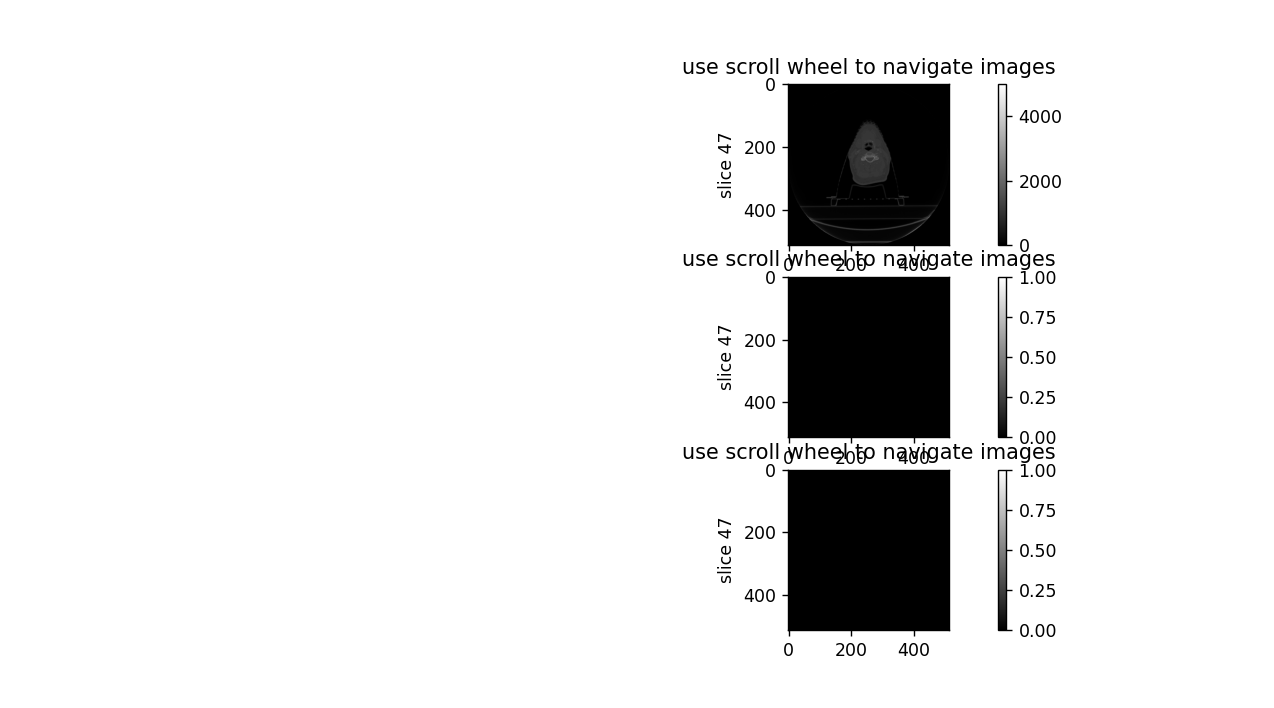

In [16]:
fig, (ax1, ax2, ax3)= plt.subplots(3, 1)
tracker1 = IndexTracker(ax1, curr1_data['image'], fig,0,5000)
fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
tracker2 = IndexTracker(ax2, curr1_data['Parotid_R']['mask'], fig,0,1)
fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
tracker3 = IndexTracker(ax3, curr2_data['Parotid_R']['mask'], fig,0,1)
fig.canvas.mpl_connect('scroll_event', tracker3.onscroll)

plt.show()

In [13]:
# save all_data is too much work
def loop_all_patients_analysis(parent_path, standard_list):
    subdirs = [os.path.join(parent_path, o) for o in os.listdir(parent_path) if os.path.isdir(os.path.join(parent_path,o))]
    
    for path in subdirs:
        all_data = generate_mask(path)
        if not ('MedMind' in all_data.keys()) and ('Mirada' in all_data.keys()) and ('Physician' in all_data.keys()):
            print("patient ", path, "doesn't contains all data")
            continue
        RS_names = ['MedMind', 'Mirada', 'Physician']
        for RS_name in RS_names:
            all_data[RS_name] = Rename_fuzzy(all_data, RS_name, standard_list)
        
        
        del all_data
    
    return 

In [134]:
file_to_write = open("geo_ralation_new.pickle", "wb")
pickle.dump(geo_relation, file_to_write)

In [52]:
test=[1,2,3,4,5,6,7,np.nan,9,10]

In [55]:
np.mean(test)

nan

In [51]:
(np.array(test)>3) & (np.array(test)<=7)

array([False, False, False,  True,  True,  True,  True, False, False,
       False])

In [59]:
np.ones(5, dtype=bool)

array([ True,  True,  True,  True,  True])

In [81]:
np.asarray(a)
y=[0,1,0]
z = np.cross(x,y)

In [98]:
x=np.asarray(x)

In [100]:
x.all([1,0,1])

TypeError: 'list' object cannot be interpreted as an integer

In [104]:
(x == test).all()

<ipython-input-104-0b8e06631695>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (x == test).all()


AttributeError: 'bool' object has no attribute 'all'

In [109]:
test=[1 1 1]

SyntaxError: invalid syntax (<ipython-input-109-17c78507093d>, line 1)

In [121]:
vec =  [1,1,1]
dis = np.linalg.norm(vec)

In [122]:
dis

1.7320508075688772

In [123]:
vec = vec/dis

In [124]:
vec

array([0.57735027, 0.57735027, 0.57735027])

In [126]:
test = np.array([1,1,1])

In [129]:
(vec == test).all()

False

In [116]:
print(vec)

[1, 2, 3]


In [118]:
vec/3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [21]:
np.array(geo_relation.keys())

array(dict_keys(['Body', 'Parotid_R', 'Parotid_L', 'Bone_Mandible', 'Lips', 'Larnyx', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Brainstem', 'Brain', 'Glottis', 'Lens_L', 'Lens_R', 'OpticChiasm', 'Musc_Constrict_I', 'Musc_Constrict_M', 'Musc_Constrict_S', 'Glnd_Submand_L', 'Glnd_Submand_R', 'SpinalCord', 'BrachialPlex_R', 'Brachialplexs', 'BrachialPlex_L', 'Eye_R', 'Eye_L', 'Temporal_R', 'Temporal_L', 'Larnx_SG', 'OpticNrv_L', 'OpticNrv_R', 'Musc_Constrict', 'Cavity_Oral', 'Nasopharynx', 'Glnd_Submands', 'Parotids', 'Glnd_Lacrimal_L', 'Glnd_Lacrimal_R', 'Temporal', 'Ear_Internal_R', 'OpticNrv', 'Arytenoid_R']),
      dtype=object)

In [29]:
list(geo_relation.keys())


['Body',
 'Parotid_R',
 'Parotid_L',
 'Bone_Mandible',
 'Lips',
 'Larnyx',
 'Esophagus',
 'Cochlea_R',
 'Cochlea_L',
 'Brainstem',
 'Brain',
 'Glottis',
 'Lens_L',
 'Lens_R',
 'OpticChiasm',
 'Musc_Constrict_I',
 'Musc_Constrict_M',
 'Musc_Constrict_S',
 'Glnd_Submand_L',
 'Glnd_Submand_R',
 'SpinalCord',
 'BrachialPlex_R',
 'Brachialplexs',
 'BrachialPlex_L',
 'Eye_R',
 'Eye_L',
 'Temporal_R',
 'Temporal_L',
 'Larnx_SG',
 'OpticNrv_L',
 'OpticNrv_R',
 'Musc_Constrict',
 'Cavity_Oral',
 'Nasopharynx',
 'Glnd_Submands',
 'Parotids',
 'Glnd_Lacrimal_L',
 'Glnd_Lacrimal_R',
 'Temporal',
 'Ear_Internal_R',
 'OpticNrv',
 'Arytenoid_R']

In [30]:
df = pd.DataFrame(np.nan, index=list(geo_relation.keys()), columns=list(geo_relation.keys()))

In [34]:
df_stat(geo_relation)

,Body,Parotid_R,Parotid_L,Bone_Mandible,Lips,Larnyx,Esophagus,Cochlea_R,Cochlea_L,Brainstem,...,Cavity_Oral,Nasopharynx,Glnd_Submands,Parotids,Glnd_Lacrimal_L,Glnd_Lacrimal_R,Temporal,Ear_Internal_R,OpticNrv,Arytenoid_R
Body,12.0,12.0,12.0,12.0,11.0,9.0,12.0,8.0,7.0,12.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_R,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_L,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bone_Mandible,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Lips,11.0,12.0,12.0,12.0,12.0,9.0,12.0,7.0,6.0,12.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Larnyx,9.0,9.0,9.0,9.0,9.0,9.0,9.0,6.0,5.0,9.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Esophagus,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_R,8.0,8.0,8.0,8.0,7.0,6.0,8.0,8.0,7.0,8.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_L,7.0,7.0,7.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
Brainstem,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Body,Parotid_R,Parotid_L,Bone_Mandible,Lips,Larnyx,Esophagus,Cochlea_R,Cochlea_L,Brainstem,...,Cavity_Oral,Nasopharynx,Glnd_Submands,Parotids,Glnd_Lacrimal_L,Glnd_Lacrimal_R,Temporal,Ear_Internal_R,OpticNrv,Arytenoid_R
Body,12.0,12.0,12.0,12.0,11.0,9.0,12.0,8.0,7.0,12.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_R,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_L,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bone_Mandible,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Lips,11.0,12.0,12.0,12.0,12.0,9.0,12.0,7.0,6.0,12.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Larnyx,9.0,9.0,9.0,9.0,9.0,9.0,9.0,6.0,5.0,9.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Esophagus,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_R,8.0,8.0,8.0,8.0,7.0,6.0,8.0,8.0,7.0,8.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_L,7.0,7.0,7.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
Brainstem,12.0,13.0,13.0,13.0,12.0,9.0,13.0,8.0,7.0,13.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
